In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
df = pd.read_csv('housing.csv', sep=',', encoding='iso-8859-1')

In [3]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


# Atributos previsores

- RM - é o numero médio de cômodos entre imoveis no bairro
- LSTAT - é a porcentagem de proprietarios no bairro considerado classe baixa 'ploretariado'
- PTRATIO - é a razão entre estudantes e professores nas escolas de ensino fundamental e medio no bairro

# Variavel alvo

- MEDV - Valor medio das casas

In [4]:
df.shape

(489, 4)

In [5]:
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

In [6]:
df.dtypes

RM         float64
LSTAT      float64
PTRATIO    float64
MEDV       float64
dtype: object

In [7]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [8]:
boxplot = px.box(df, y='RM')
boxplot.show()

In [9]:
boxplot = px.box(df, y='LSTAT')
boxplot.show()

In [10]:
boxplot = px.box(df, y='PTRATIO')
boxplot.show()

In [11]:
boxplot = px.box(df, y='MEDV')
boxplot.show()

# Correlação linear simples

In [12]:
import matplotlib.pyplot as plt

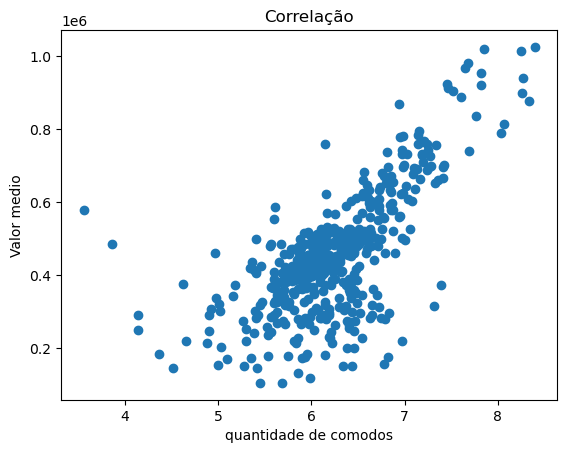

In [13]:
plt.scatter(df.RM,df.MEDV)
plt.title('Correlação')
plt.xlabel('quantidade de comodos')
plt.ylabel('Valor medio')
plt.grid(False)

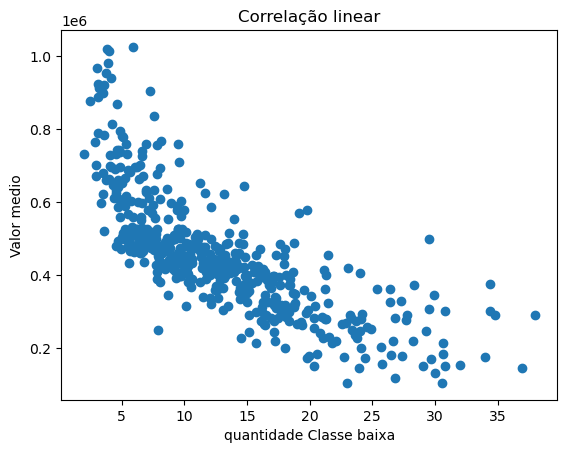

In [14]:
plt.scatter(df.LSTAT,df.MEDV)
plt.title('Correlação linear')
plt.xlabel('quantidade Classe baixa')
plt.ylabel('Valor medio')
plt.grid(False)

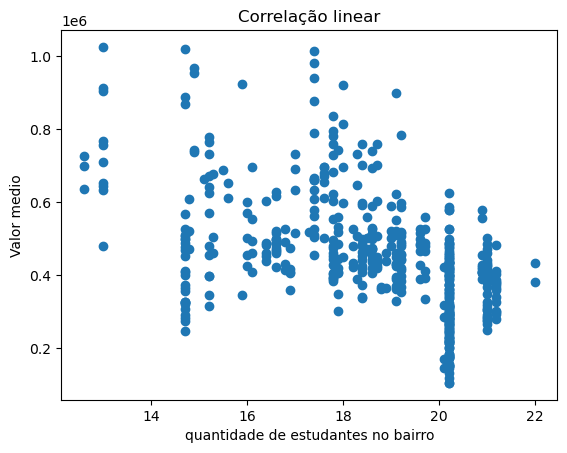

In [15]:
plt.scatter(df.PTRATIO,df.MEDV)
plt.title('Correlação linear')
plt.xlabel('quantidade de estudantes no bairro')
plt.ylabel('Valor medio')
plt.grid(False)

In [16]:
import seaborn as sns

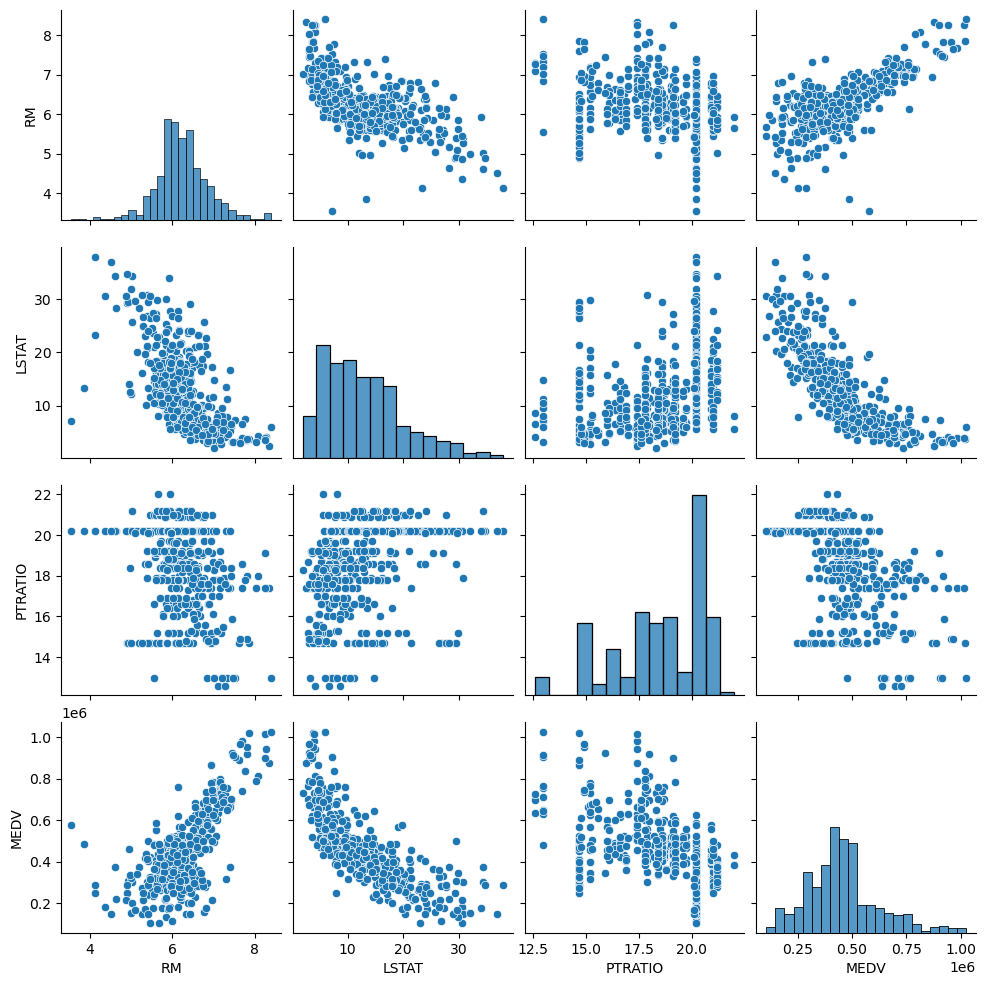

In [17]:
sns.pairplot(df);

# Análise da Normalidade

Gráfico qq-Plot 

In [18]:
import scipy.stats as stats

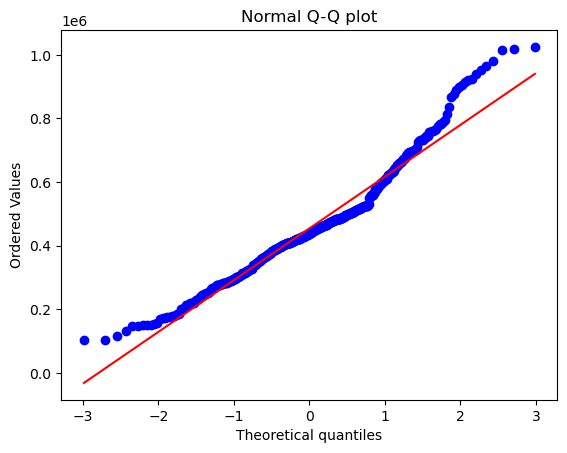

In [19]:
stats.probplot(df['MEDV'], dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()

In [20]:
import plotly.express as px

In [21]:
hist = px.histogram(df, x='MEDV', nbins=60)
hist.update_layout(width = 800, height=500, title_text='Media dos valores')
hist.show()

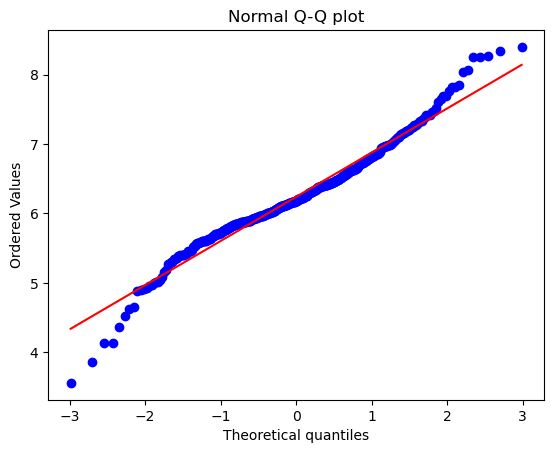

In [22]:
stats.probplot(df['RM'], dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()

In [23]:
hist = px.histogram(df, x='RM', nbins=60)
hist.update_layout(width = 800, height=500, title_text='Numero medio de comodos')
hist.show()

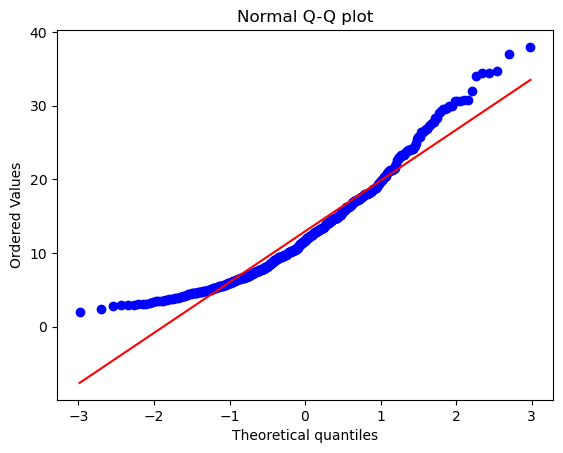

In [24]:
stats.probplot(df['LSTAT'], dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()

In [25]:
hist = px.histogram(df, x='LSTAT', nbins=60)
hist.update_layout(width = 800, height=500, title_text='Quantidade de classe baixa')
hist.show()

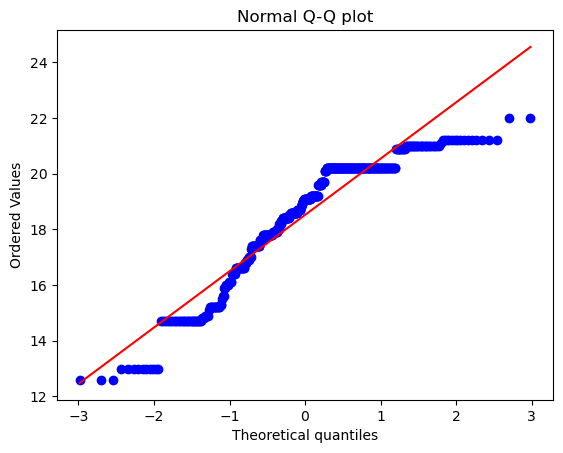

In [26]:
stats.probplot(df['PTRATIO'], dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()

In [27]:
hist = px.histogram(df, x='PTRATIO', nbins=60)
hist.update_layout(width = 800, height=500, title_text='Relação estudantes professores')
hist.show()

### Teste shapiro-wilk

- Ho = distribuição normal: p>0.05
- Ha = dostribuição != normal: p<= 0.05

In [28]:
stats.shapiro(df.MEDV)

ShapiroResult(statistic=np.float64(0.9596616055953767), pvalue=np.float64(2.5759801704018553e-10))

In [29]:
estatistica, p = stats.shapiro(df.MEDV)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.9596616055953767
p-valor: 2.5759801704018553e-10


In [30]:
estatistica, p = stats.shapiro(df.RM)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.9708170375303297
p-valor: 2.7090145811327798e-08


In [31]:
estatistica, p = stats.shapiro(df.LSTAT)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.9371757140975832
p-valor: 1.689879707182205e-13


In [32]:
estatistica, p = stats.shapiro(df.PTRATIO)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.90647424903615
p-valor: 9.064596547331122e-17


### Teste Lilliefors (Kolmogov_Sminorv)

In [33]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

In [34]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df.MEDV, dist = 'norm')
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.11370576407672117
p-valor: 0.0009999999999998899


In [35]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df.RM, dist = 'norm')
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.06394344399233598
p-valor: 0.0009999999999998899


## Correlação linear

# Coeficientes de Correlação e Testes de Hipóteses

## Tipos de Coeficientes de Correlação

- **Pearson**  
  Utilizado quando os dados seguem uma **distribuição normal**.

- **Spearman**  
  Utilizado quando os dados **não seguem uma distribuição normal**.

- **Kendall**  
  Recomendado para dados **não normais** e quando se tem uma **quantidade pequena de amostras**.

---

## Teste de Hipóteses para Correlação

### Hipótese Nula (Ho)  
Não há correlação linear entre as variáveis.  
**Critério de aceitação:** valor-p > 0,05

### Hipótese Alternativa (Ha)  
Existe correlação linear entre as variáveis.  
**Critério de rejeição:** valor-p ≤ 0,05

In [36]:
# Pearson
#coef, p = stats.pearsonr(df['MEDV'], df['RM'])
#print('Coeficiente de correlação: {}'.format(coef))
#print('p-valor: {}'.format(p))

In [37]:
# Spearman
coef, p = stats.spearmanr(df['MEDV'], df['RM'])
print('Coeficiente de correlação: {}'.format(coef))
print('p-valor: {}'.format(p))

Coeficiente de correlação: 0.6240572939087418
p-valor: 3.845028634343325e-54


In [38]:
# Kendall
#coef, p = stats.kendalltau(df['MEDV'], df['RM'])
#print('Coeficiente de correlação: {}'.format(coef))
#print('p-valor: {}'.format(p))

In [39]:
correlacoes = df.corr(method="spearman")
correlacoes

,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.624700,-0.282053,0.624057
LSTAT,-0.624700,1.000000,0.461739,-0.845527
PTRATIO,-0.282053,0.461739,1.000000,-0.559276
MEDV,0.624057,-0.845527,-0.559276,1.000000


<Axes: >

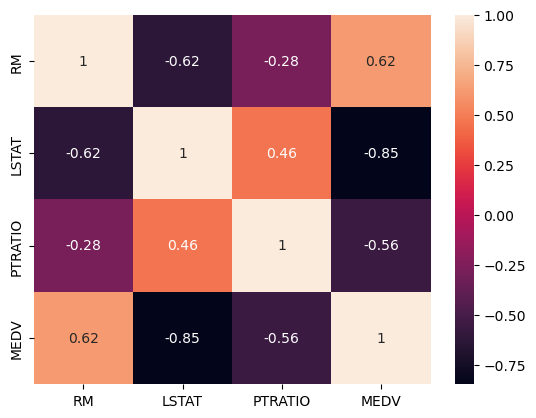

In [40]:
sns.heatmap(correlacoes, annot=True)

# Regressão linear simples 

In [41]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


In [42]:
x1 = df.iloc[:, 0:1].values
x1

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [43]:
y = df.iloc[:, 3].values
y

array([ 504000.,  453600.,  728700.,  701400.,  760200.,  602700.,
        480900.,  569100.,  346500.,  396900.,  315000.,  396900.,
        455700.,  428400.,  382200.,  417900.,  485100.,  367500.,
        424200.,  382200.,  285600.,  411600.,  319200.,  304500.,
        327600.,  291900.,  348600.,  310800.,  386400.,  441000.,
        266700.,  304500.,  277200.,  275100.,  283500.,  396900.,
        420000.,  441000.,  518700.,  646800.,  732900.,  558600.,
        531300.,  518700.,  445200.,  405300.,  420000.,  348600.,
        302400.,  407400.,  413700.,  430500.,  525000.,  491400.,
        396900.,  743400.,  518700.,  663600.,  489300.,  411600.,
        392700.,  336000.,  466200.,  525000.,  693000.,  493500.,
        407400.,  462000.,  365400.,  438900.,  508200.,  455700.,
        478800.,  491400.,  506100.,  449400.,  420000.,  436800.,
        445200.,  426300.,  588000.,  501900.,  520800.,  480900.,
        501900.,  558600.,  472500.,  466200.,  495600.,  6027

In [44]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x1, y, test_size=0.3, random_state = 10)

In [45]:
x_treino.shape, y_treino.shape

((342, 1), (342,))

In [46]:
x_teste.shape, y_teste.shape

((147, 1), (147,))

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
reg_linear1 = LinearRegression()
reg_linear1.fit(x_treino, y_treino)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [49]:
reg_linear1.intercept_

np.float64(-626510.2699464143)

In [50]:
reg_linear1.coef_

array([173771.45170999])

## Equação:  Valor = -626510,27 + 173771,45 . número_cômodos

In [51]:
#Coeficiente de Determinação dados de treino
reg_linear1.score(x_treino, y_treino)

0.46368351515551953

In [52]:
reg_linear1.score(x_teste, y_teste)

0.5426573915930195

In [53]:
previsoes_treino = reg_linear1.predict(x_treino)
previsoes_treino

array([551833.94409904, 468423.64727824, 647755.78544295, 658182.07254555,
       586414.46298932, 464600.67534062, 395265.86610833, 229487.901177  ,
       441141.52935977, 424980.78435074, 523161.65456689, 432105.41387085,
       555135.60168153,  44768.84800928, 504915.65213734, 424285.6985439 ,
       565735.66023583, 607962.12300136, 455912.10275512, 442531.70097345,
       505784.50939589, 450003.87339698, 410210.21095539, 390226.49400874,
       472767.93357099, 809884.54988837, 401174.09546647, 639762.29866429,
       465817.07550259, 491882.79325909, 437318.55742215, 416813.52612037,
       413164.32563446, 560870.05958796, 396134.72336688, 459561.30324103,
       335488.4867201 , 521423.94004979, 441315.30081148, 630899.95462708,
       452262.90226921, 557915.94490889, 437144.78597044, 391616.66562242,
       525420.68343912, 459735.07469274, 397872.43788398, 492925.42196935,
       387619.92223309, 533240.39876607, 487538.50696634, 608483.43735649,
       832822.38151409, 4

In [54]:
import matplotlib.pyplot as plt

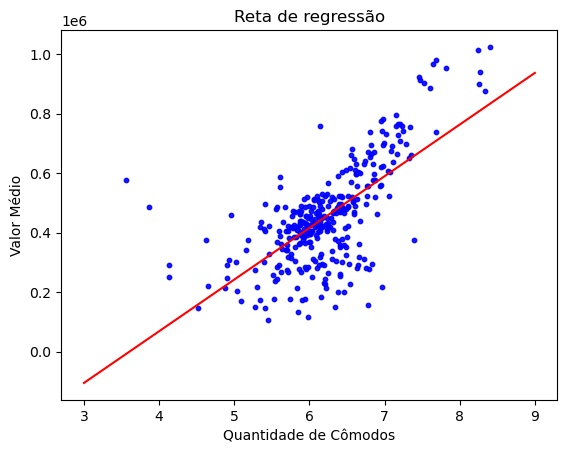

In [55]:
plt.scatter(y=y_treino, x=x_treino, color='blue', s=10, alpha=0.9)

X_plot = np.linspace(3, 9)

plt.plot(
    X_plot,
    X_plot * reg_linear1.coef_ + reg_linear1.intercept_,
    color='r'
)

plt.title('Reta de regressão')
plt.ylabel('Valor Médio')
plt.xlabel('Quantidade de Cômodos')
plt.show()

In [56]:
previsoes_teste = reg_linear1.predict(x_teste)
previsoes_teste

array([419593.86934773, 438187.4146807 , 447744.84452475, 480935.19180136,
       491013.93600054, 494836.90793816, 563650.40281531, 438187.4146807 ,
       500745.1372963 , 482151.59196333, 452436.67372092, 452784.21662434,
       585719.37718248, 394744.5517532 , 321239.22767988, 442705.47242516,
       458171.13162735, 446702.21581449, 442357.92952174, 488581.1356766 ,
       592322.69234746, 244432.24602406, 412816.78273104, 540365.02828618,
       421331.58386483, 554092.97297127, 470856.44760218, 369373.91980354,
       732382.48242572, 411947.92547249, 484758.16373898, 514646.8534331 ,
       565561.88878412, 438534.95758412, 661483.73012804, 452957.98807605,
       579984.91927605, 402911.80998357, 351475.46027742, 537063.37070369,
       491535.25035567, 490145.07874199, 637503.26979206, 512735.36746429,
       722825.05258167, 631768.81188563, 489971.30729028, 353039.40334281,
       471551.53340902, 466512.16130943, 446007.13000765, 384492.03610231,
       390747.80836387, 3

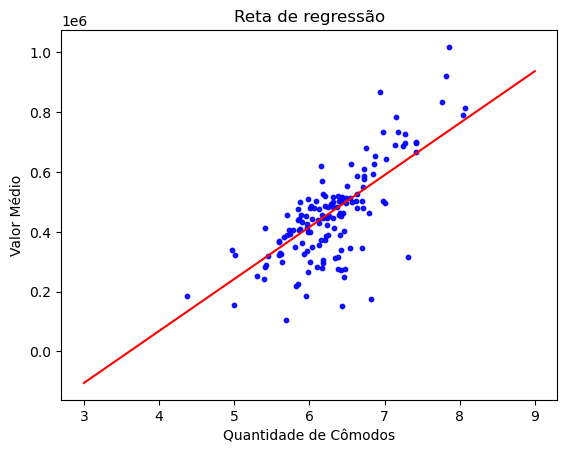

In [57]:
plt.scatter(y=y_teste, x=x_teste, color='blue', s=10, alpha=0.9)

X_plot = np.linspace(3, 9)

plt.plot(
    X_plot,
    X_plot * reg_linear1.coef_ + reg_linear1.intercept_,
    color='r'
)

plt.title('Reta de regressão')
plt.ylabel('Valor Médio')
plt.xlabel('Quantidade de Cômodos')
plt.show()

In [58]:
# fazendo previsões para valores distintos 
valor_casa = reg_linear1.predict([[9]])
valor_casa

array([937432.79544351])

## Metrica de desempenho 

In [59]:
# erro absoluto 
abs(y_teste - previsoes_teste).mean()

np.float64(76063.99733079868)

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [61]:
#erro médio absoluto
mean_absolute_error(y_teste, previsoes_teste)

76063.99733079868

In [62]:
mean_squared_error(y_teste, previsoes_teste)

11294624525.740473

In [63]:
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

np.float64(106276.17101561607)

# Valor médio (MEDV) em função da classe social 

In [64]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


In [65]:
x2 = df.iloc[:,1:2].values
x2

array([[ 4.98],
       [ 9.14],
       [ 4.03],
       [ 2.94],
       [ 5.33],
       [ 5.21],
       [12.43],
       [19.15],
       [29.93],
       [17.1 ],
       [20.45],
       [13.27],
       [15.71],
       [ 8.26],
       [10.26],
       [ 8.47],
       [ 6.58],
       [14.67],
       [11.69],
       [11.28],
       [21.02],
       [13.83],
       [18.72],
       [19.88],
       [16.3 ],
       [16.51],
       [14.81],
       [17.28],
       [12.8 ],
       [11.98],
       [22.6 ],
       [13.04],
       [27.71],
       [18.35],
       [20.34],
       [ 9.68],
       [11.41],
       [ 8.77],
       [10.13],
       [ 4.32],
       [ 1.98],
       [ 4.84],
       [ 5.81],
       [ 7.44],
       [ 9.55],
       [10.21],
       [14.15],
       [18.8 ],
       [30.81],
       [16.2 ],
       [13.45],
       [ 9.43],
       [ 5.28],
       [ 8.43],
       [14.8 ],
       [ 4.81],
       [ 5.77],
       [ 3.95],
       [ 6.86],
       [ 9.22],
       [13.15],
       [14.44],
       [

In [66]:
y = df.iloc[:,3].values
y

array([ 504000.,  453600.,  728700.,  701400.,  760200.,  602700.,
        480900.,  569100.,  346500.,  396900.,  315000.,  396900.,
        455700.,  428400.,  382200.,  417900.,  485100.,  367500.,
        424200.,  382200.,  285600.,  411600.,  319200.,  304500.,
        327600.,  291900.,  348600.,  310800.,  386400.,  441000.,
        266700.,  304500.,  277200.,  275100.,  283500.,  396900.,
        420000.,  441000.,  518700.,  646800.,  732900.,  558600.,
        531300.,  518700.,  445200.,  405300.,  420000.,  348600.,
        302400.,  407400.,  413700.,  430500.,  525000.,  491400.,
        396900.,  743400.,  518700.,  663600.,  489300.,  411600.,
        392700.,  336000.,  466200.,  525000.,  693000.,  493500.,
        407400.,  462000.,  365400.,  438900.,  508200.,  455700.,
        478800.,  491400.,  506100.,  449400.,  420000.,  436800.,
        445200.,  426300.,  588000.,  501900.,  520800.,  480900.,
        501900.,  558600.,  472500.,  466200.,  495600.,  6027

In [67]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x2, y, test_size=0.3, random_state=10)

In [68]:
x_treino.shape, y_treino.shape

((342, 1), (342,))

In [69]:
x_teste.shape, y_teste.shape

((147, 1), (147,))

In [70]:
from sklearn.linear_model import LinearRegression
reg_linear2 = LinearRegression()
reg_linear2.fit(x_treino, y_treino)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [71]:
# Intercepto (coeficiente linear)
reg_linear2.intercept_

np.float64(681977.7451055486)

In [72]:
reg_linear2.coef_

array([-17263.75010515])

In [73]:
reg_linear2.score(x_treino,y_treino)

0.5688289563355992

In [74]:
previsoes_treino = reg_linear2.predict(x_treino)
previsoes_treino

array([549564.78179906, 401787.080899  , 547493.13178645, 392982.56834537,
       594968.4445756 , 475330.65634693, 474294.83134062, 172179.20450053,
       525050.25664975, 358109.79313297, 527812.45666658, 386940.25580857,
       595141.08207665, 451851.95620393, 590825.14455037, 383660.14328859,
       624489.45725541, 543004.55675911, 413526.4309705 , 422676.21852623,
       572180.29443681, 457548.99373862, 507095.9565404 , 397643.78087376,
       492594.40645207, 610505.81967024, 365533.20567819, 611541.64467654,
       527639.81916553, 401959.71840005, 578740.51947676, 435624.03110509,
       370021.78070552, 342054.50553518, 530229.3816813 , 587027.11952723,
       274553.24262406, 554743.90683061, 563548.41938423, 562339.95687687,
       420086.65601045, 613785.93219021, 536271.6942181 , 515555.19409192,
       280250.28015875, 437005.1311135 , 499672.54399519, 541105.54424754,
       359836.16814349, 475158.01884588, 422676.21852623, 533336.85670022,
       579948.98198412, 5

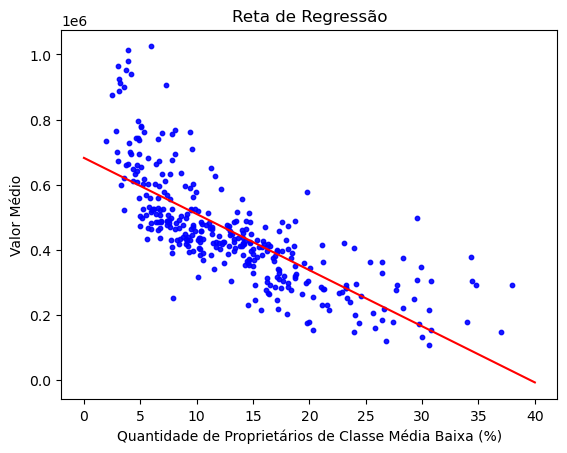

In [75]:
# Gráfico de dispersão
plt.scatter(
    x_treino,
    y_treino,
    color='blue',
    s=10,
    alpha=0.9
)

# Linha de regressão
x_plot = np.linspace(0, 40, 100)
y_plot = reg_linear2.coef_[0] * x_plot + reg_linear2.intercept_

plt.plot(x_plot, y_plot, color='red')

# Títulos e rótulos
plt.title('Reta de Regressão')
plt.xlabel('Quantidade de Proprietários de Classe Média Baixa (%)')
plt.ylabel('Valor Médio')

plt.show()

In [76]:
previsoes_teste = reg_linear2.predict(x_teste)
previsoes_teste

array([507441.2315425 , 438731.50612401, 518490.0316098 , 500708.36900149,
       594277.8945714 , 539897.08174018, 551981.70681378, 483789.89389845,
       580121.61948518, 272999.50511459, 558714.56935479, 553535.44432325,
       584610.19451251, 472395.81882905, 370194.41820658, 454959.43122285,
       496565.06897626, 474122.19383957, 363288.91816452, 348614.73057514,
       426646.88105041, 472741.09383115, 480855.05638057, 506578.04403724,
       357419.24312877, 570108.64442419, 573388.75694417, 447018.10617448,
       620346.15723017, 353793.85560668, 452887.78121023, 521770.14412977,
       562512.59437792, 420949.84351571, 591343.05705352, 378135.74325494,
       602737.13212292, 400578.61839164, 394536.30585483, 558024.01935059,
       180465.804551  , 557678.74434848, 567691.71940947, 603255.04462607,
       551463.79431063, 587199.75702829, 474294.83134062, 365360.56817713,
       490350.11893841, 601356.03211451, 351376.93059196, 300276.23028073,
       271273.13010408, 4

In [77]:
y_teste

array([ 487200.,  428400.,  525000.,  483000.,  516600.,  462000.,
        592200.,  476700.,  512400.,  275100.,  487200.,  518700.,
        501900.,  499800.,  319200.,  621600.,  483000.,  445200.,
        373800.,  273000.,  644700.,  321300.,  510300.,  478800.,
        348600.,  462000.,  516600.,  405300.,  919800.,  266700.,
        455700.,  499800.,  627900.,  357000.,  665700.,  373800.,
        867300.,  327600.,  327600.,  501900.,  151200.,  499800.,
        726600.,  625800.,  835800.,  686700.,  338100.,  300300.,
        499800.,  493500.,  569100.,  220500.,  226800.,  411600.,
        478800.,  241500.,  655200.,  432600.,  441000.,  405300.,
        462000.,  252000.,  495600.,  577500.,  512400.,  392700.,
        279300.,  480900.,  497700.,  554400.,  399000.,  369600.,
        315000.,  445200.,  585900.,  105000.,  388500.,  453600.,
        312900.,  336000.,  315000.,  501900.,  323400.,  476700.,
        382200.,  609000.,  390600.,  413700.,  426300.,  2835

In [78]:
reg_linear2.score(x_teste, y_teste)

0.6006038196307664

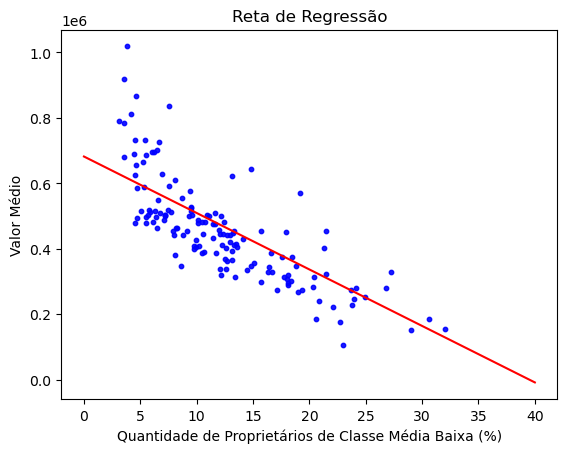

In [79]:
# Gráfico de dispersão
plt.scatter(
    x_teste,
    y_teste,
    color='blue',
    s=10,
    alpha=0.9
)

# Linha de regressão
x_plot = np.linspace(0, 40, 100)
y_plot = reg_linear2.coef_[0] * x_plot + reg_linear2.intercept_

plt.plot(x_plot, y_plot, color='red')

# Títulos e rótulos
plt.title('Reta de Regressão')
plt.xlabel('Quantidade de Proprietários de Classe Média Baixa (%)')
plt.ylabel('Valor Médio')

plt.show()

In [80]:
valor_casa = reg_linear2.predict([[2]])
valor_casa

array([647450.24489525])

## Métricas de desempenho

In [81]:
# Erro absoluto
abs(y_teste- previsoes_teste).mean()

np.float64(76340.55192245146)

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [83]:
mean_absolute_error(y_teste, previsoes_teste)

76340.55192245146

In [84]:
mean_squared_error(y_teste, previsoes_teste)

9863567949.634668

In [85]:
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

np.float64(99315.49702657017)

## Validação cruzada

In [86]:
from sklearn.model_selection import KFold, cross_val_score

In [87]:
kfold = KFold(n_splits=15, shuffle=True, random_state=5)

In [88]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
resultado = cross_val_score(modelo, x2, y, cv=kfold)
resultado

array([0.73997836, 0.52496442, 0.2753212 , 0.77336843, 0.7096672 ,
       0.34726472, 0.66194425, 0.68820343, 0.411042  , 0.5519506 ,
       0.5776707 , 0.37648029, 0.60443851, 0.64797086, 0.5056103 ])

In [89]:
print('Score médio: %.2f%%' % (resultado.mean() * 100))

Score médio: 55.97%


# Avaliando a Regressão Linear Simples com Statsmodels

In [90]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [91]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


In [92]:
x2 = df.iloc[:,1:2].values
x2

array([[ 4.98],
       [ 9.14],
       [ 4.03],
       [ 2.94],
       [ 5.33],
       [ 5.21],
       [12.43],
       [19.15],
       [29.93],
       [17.1 ],
       [20.45],
       [13.27],
       [15.71],
       [ 8.26],
       [10.26],
       [ 8.47],
       [ 6.58],
       [14.67],
       [11.69],
       [11.28],
       [21.02],
       [13.83],
       [18.72],
       [19.88],
       [16.3 ],
       [16.51],
       [14.81],
       [17.28],
       [12.8 ],
       [11.98],
       [22.6 ],
       [13.04],
       [27.71],
       [18.35],
       [20.34],
       [ 9.68],
       [11.41],
       [ 8.77],
       [10.13],
       [ 4.32],
       [ 1.98],
       [ 4.84],
       [ 5.81],
       [ 7.44],
       [ 9.55],
       [10.21],
       [14.15],
       [18.8 ],
       [30.81],
       [16.2 ],
       [13.45],
       [ 9.43],
       [ 5.28],
       [ 8.43],
       [14.8 ],
       [ 4.81],
       [ 5.77],
       [ 3.95],
       [ 6.86],
       [ 9.22],
       [13.15],
       [14.44],
       [

In [93]:
y = df.iloc[:,3].values
y

array([ 504000.,  453600.,  728700.,  701400.,  760200.,  602700.,
        480900.,  569100.,  346500.,  396900.,  315000.,  396900.,
        455700.,  428400.,  382200.,  417900.,  485100.,  367500.,
        424200.,  382200.,  285600.,  411600.,  319200.,  304500.,
        327600.,  291900.,  348600.,  310800.,  386400.,  441000.,
        266700.,  304500.,  277200.,  275100.,  283500.,  396900.,
        420000.,  441000.,  518700.,  646800.,  732900.,  558600.,
        531300.,  518700.,  445200.,  405300.,  420000.,  348600.,
        302400.,  407400.,  413700.,  430500.,  525000.,  491400.,
        396900.,  743400.,  518700.,  663600.,  489300.,  411600.,
        392700.,  336000.,  466200.,  525000.,  693000.,  493500.,
        407400.,  462000.,  365400.,  438900.,  508200.,  455700.,
        478800.,  491400.,  506100.,  449400.,  420000.,  436800.,
        445200.,  426300.,  588000.,  501900.,  520800.,  480900.,
        501900.,  558600.,  472500.,  466200.,  495600.,  6027

In [94]:
#criação do modelo 

In [95]:
regressao = smf.ols('y ~ x2', data = df).fit()

In [96]:
residuos = regressao.resid
residuos

0      -91698.432398
1      -68220.791356
2      116130.471691
3       69473.109014
4      170717.234516
           ...      
484    -42008.495743
485    -90286.334256
486    -82077.460502
487   -107059.859907
488   -294297.192249
Length: 489, dtype: float64

## Teste de normalidade dos residuos

Ho = distribuição normal: p > 0.05

Ha = distribuição != normal p <= 0.05

In [97]:
estatistica, p = stats.shapiro(residuos)
print('Estatística de teste {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste 0.9171057147431392
p-valor: 9.78292336065136e-16


In [98]:
import scipy.stats as stats

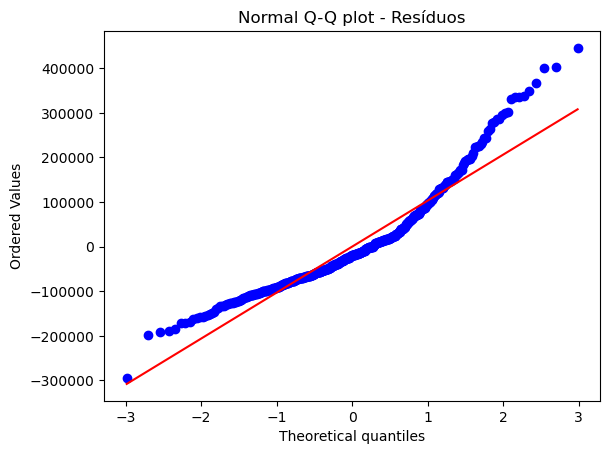

In [99]:
stats.probplot(residuos, dist='norm', plot=plt)
plt.title('Normal Q-Q plot - Resíduos')
plt.show()

## Análise da homocedasticidade dos resíduos

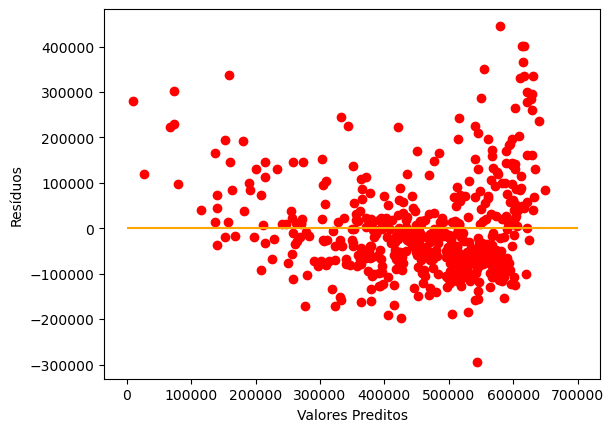

In [101]:
plt.scatter(y=residuos, x=regressao.predict(), color='red')
plt.hlines(y=0, xmin=0, xmax=700000, color='orange')
plt.ylabel('Resíduos')
plt.xlabel('Valores Preditos')
plt.show()


In [102]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [103]:
estatística, p, f, fp = sms.het_breuschpagan(regressao.resid, regressao.model.exog)
print('Estatística de teste: {}'.format(estatística))
print('p-valor: {}'.format(p))
print('f-valor: {}'.format(f))
print('f_p-valor: {}'.format(fp))

Estatística de teste: 5.3825533640267285
p-valor: 0.020339089399132346
f-valor: 5.420200421872106
f_p-valor: 0.020313692181464678


## outliers nos resíduos

In [104]:
outliers = regressao.outlier_test()

In [105]:
outliers.max()

student_resid    4.227468
unadj_p          0.999732
bonf(p)          1.000000
dtype: float64

In [106]:
outliers.min()

student_resid   -2.762057
unadj_p          0.000028
bonf(p)          0.013809
dtype: float64

### Modelo não consistente

# Regressão linear

In [108]:
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     668.7
Date:                Wed, 14 Jan 2026   Prob (F-statistic):           1.93e-93
Time:                        00:04:48   Log-Likelihood:                -6357.8
No. Observations:                 489   AIC:                         1.272e+04
Df Residuals:                     487   BIC:                         1.273e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.841e+05   1.01e+04     67.551      0.0

In [109]:
coefs = pd.DataFrame(regressao.params)
coefs.columns = ['Coeficientes']
print(coefs)

            Coeficientes
Intercept  684138.493068
x2         -17759.048327


In [111]:
regressao.params

Intercept    684138.493068
x2           -17759.048327
dtype: float64

In [112]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [113]:
regressao.predict()

array([595698.43239814, 521820.79135628, 612569.52830915, 631926.89098598,
       589482.76548356, 591613.85128285, 463393.52235923, 344052.7175993 ,
       152610.17663024, 380458.76667041, 320965.95477372, 448475.92176424,
       405143.84384545, 537448.75388437, 501930.65722963, 533719.35373562,
       567283.95507435, 423613.25410592, 476535.21812149, 483816.42793571,
       310843.29722712, 438530.85470091, 351689.10838007, 331088.61232032,
       394666.00533231, 390936.60518356, 421126.98734009, 377262.13797148,
       456822.6744781 , 471385.09410655, 282784.00086987, 452560.50287953,
       192035.26391701, 358259.9562612 , 322919.45008973, 512230.9052595 ,
       481507.75165315, 528391.63923741, 504239.33351218, 607419.40429421,
       648975.57738026, 598184.69916397, 580958.42228643, 552011.17351281,
       514539.58154206, 502818.60964599, 432847.95923615, 350268.38451388,
       136982.21410216, 396441.91016504, 445279.29306531, 516670.66734134,
       590370.71789993, 5

/tmp/ipykernel_23040/3378295041.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



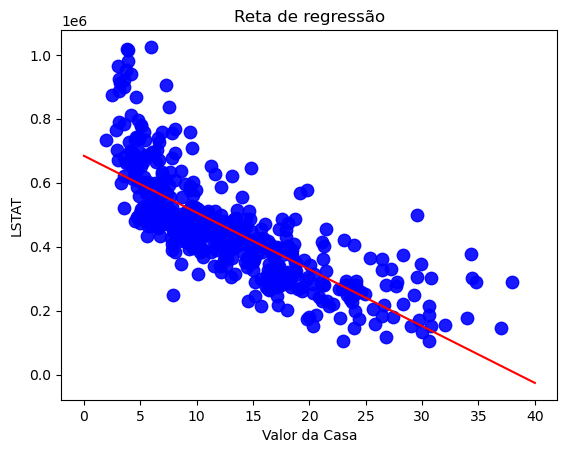

In [114]:
plt.scatter(y=df.MEDV, x=df.LSTAT, color='blue', s=80, alpha=0.9)
X_plot = np.linspace(0, 40)
plt.plot(X_plot, X_plot*regressao.params[1] + regressao.params[0], color='r')
plt.title('Reta de regressão')
plt.xlabel('Valor da Casa')
plt.ylabel('LSTAT')
plt.show()